In [1]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC

# Load multi-class classification dataset
from deepforest import CascadeForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
# Load the dataset and split into train/test splits

# df = pd.read_csv('479.csv',sep=",") 
# del df['Unnamed: 0']

df=pd.read_csv('UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=";")  
del df['Unnamed: 0']
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,1,tcp,192.168.100.147,49960,192.168.100.7,80,9,0.068909,75,0.000000,1,0.068909,96,14.511893,0.566862,0.137818,1,DoS,HTTP
1,2,arp,192.168.100.7,-1,192.168.100.147,-1,10,0.000000,2,0.000131,2,0.000131,1,0.000000,0.000000,0.000131,1,DoS,HTTP
2,3,tcp,192.168.100.147,49962,192.168.100.7,80,11,0.064494,75,0.000000,1,0.064494,96,15.505319,0.567549,0.128988,1,DoS,HTTP
3,4,tcp,192.168.100.147,49964,192.168.100.7,80,12,0.064189,75,0.000000,1,0.064189,96,15.578993,0.567570,0.128378,1,DoS,HTTP
4,5,tcp,192.168.100.147,49966,192.168.100.7,80,13,0.063887,75,0.000000,1,0.063887,96,15.652637,0.567630,0.127774,1,DoS,HTTP


In [4]:
# 'attack','category','subcategory'
ten_best_features = df[['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max','attack']]

In [5]:
pd.value_counts(df.category)

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

In [6]:
classes = list(ten_best_features['attack'].unique()) 
classes

[1, 0]

In [7]:
labels = ['seq','stddev','N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max']

In [8]:
# Load the dataset and split into train/test splits

ten_best_features = ten_best_features.values

y = ten_best_features[:,10]
X = ten_best_features[:,0:10]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# ROC AUC

In [9]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.model_selection import FeatureImportances

--------------------------------------------
ROCAUC attack
--------------------------------------------


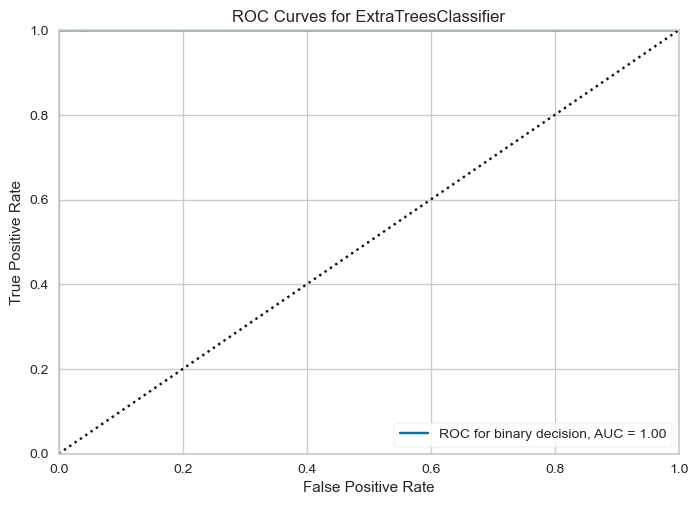

--------------------------------------------
confusion_matrix classification_report attack
--------------------------------------------
accuracy_score: 0.9999918223226966 ExtraTreesClassifier()
[[    136       5]
 [      4 1100412]]


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       141
         1.0       1.00      1.00      1.00   1100416

    accuracy                           1.00   1100557
   macro avg       0.99      0.98      0.98   1100557
weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz attack
--------------------------------------------


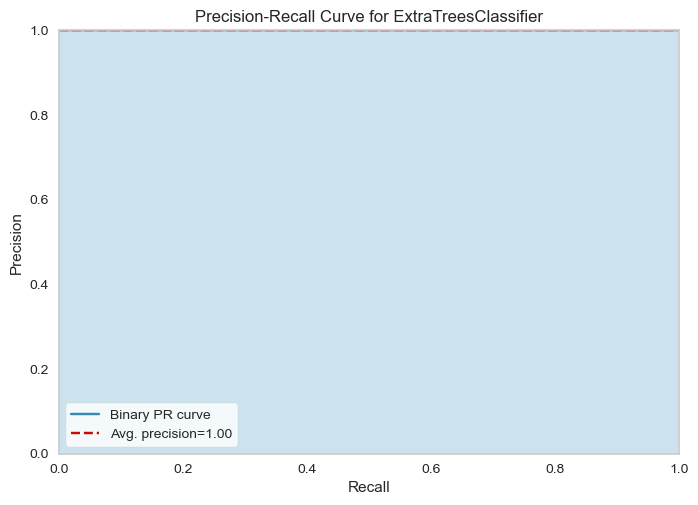

--------------------------------------------
PrecisionRecallCurve attack
--------------------------------------------


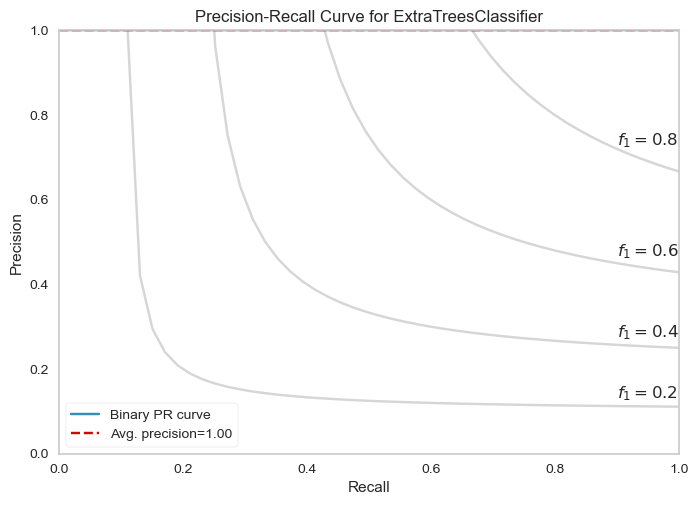

--------------------------------------------
ROCAUC attack
--------------------------------------------


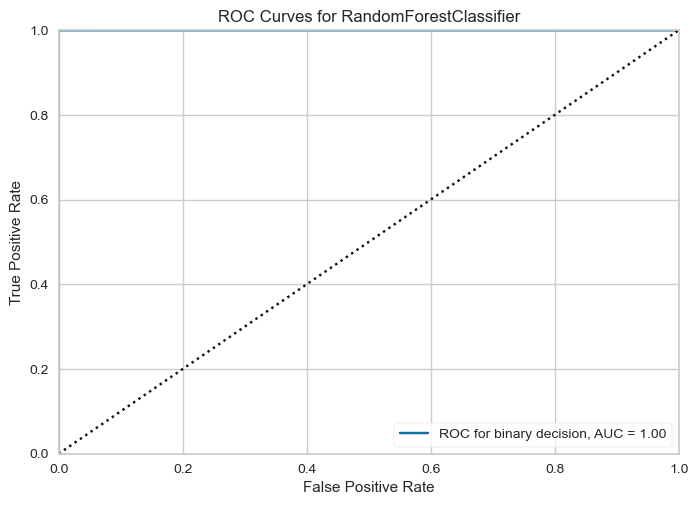

--------------------------------------------
confusion_matrix classification_report attack
--------------------------------------------
accuracy_score: 0.999992730953508 RandomForestClassifier()
[[    135       6]
 [      2 1100414]]


              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       141
         1.0       1.00      1.00      1.00   1100416

    accuracy                           1.00   1100557
   macro avg       0.99      0.98      0.99   1100557
weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz attack
--------------------------------------------


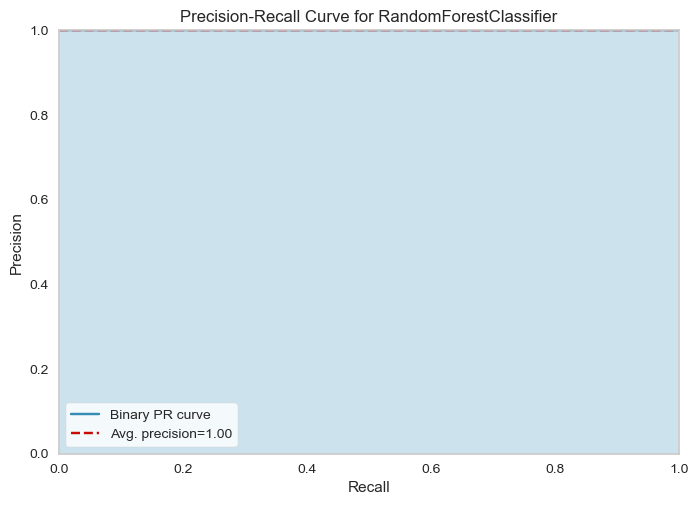

--------------------------------------------
PrecisionRecallCurve attack
--------------------------------------------


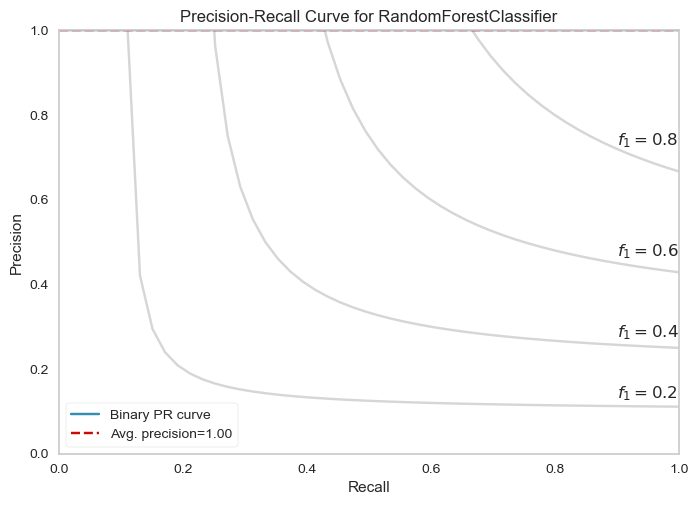

--------------------------------------------
ROCAUC attack
--------------------------------------------


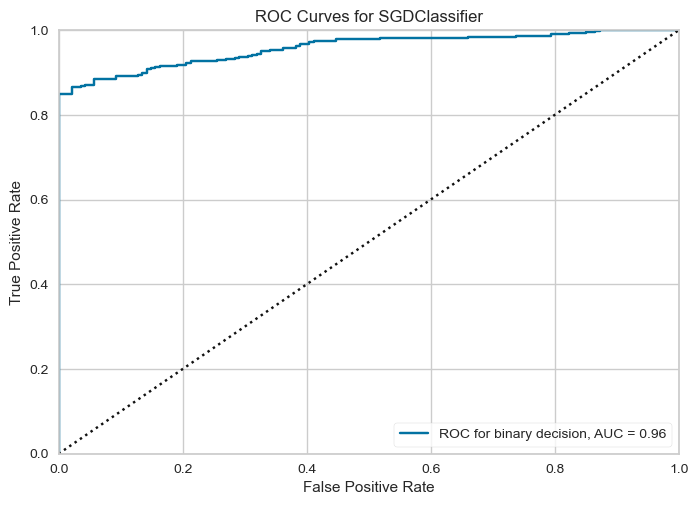

--------------------------------------------
confusion_matrix classification_report attack
--------------------------------------------
accuracy_score: 0.9998718830555801 SGDClassifier()
[[      0     141]
 [      0 1100416]]


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       141
         1.0       1.00      1.00      1.00   1100416

    accuracy                           1.00   1100557
   macro avg       0.50      0.50      0.50   1100557
weighted avg       1.00      1.00      1.00   1100557

--------------------------------------------
recall_curve_viz attack
--------------------------------------------


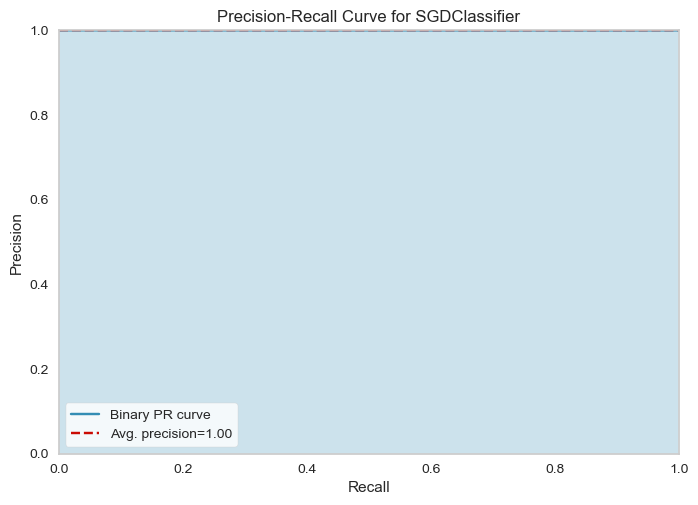

--------------------------------------------
PrecisionRecallCurve attack
--------------------------------------------


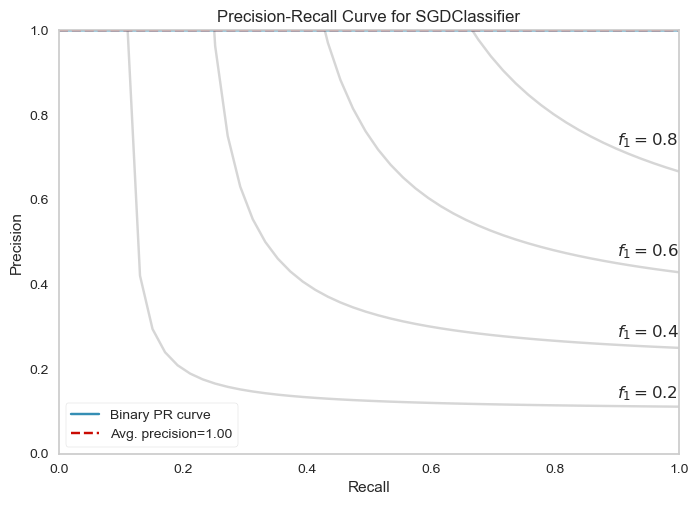

--------------------------------------------
ROCAUC attack
--------------------------------------------
[2023-01-12 16:58:35.752] Start to fit the model:
[2023-01-12 16:58:35.752] Fitting cascade layer = 0 
[2023-01-12 17:06:32.752] layer = 0  | Val Acc = 99.999 % | Elapsed = 477.000 s
[2023-01-12 17:06:33.496] Fitting cascade layer = 1 
[2023-01-12 17:11:20.138] layer = 1  | Val Acc = 99.999 % | Elapsed = 286.642 s
[2023-01-12 17:11:20.138] Early stopping counter: 1 out of 2
[2023-01-12 17:11:20.595] Fitting cascade layer = 2 


In [ ]:
models = [
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(n_estimators=100),
    SGDClassifier(),
    CascadeForestClassifier() 
]

for model in models:
     
    # Instaniate the classification model and visualizer
    print("--------------------------------------------")
    print("ROCAUC attack")
    print("--------------------------------------------")
    visualizer = ROCAUC(model, classes=classes, binary=True)
    visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()                       # Finalize and render the figure
    #visualizer
    
    print("--------------------------------------------")
    print("confusion_matrix classification_report attack")
    print("--------------------------------------------")
    
    predicted = visualizer.predict(X_test)
    print("accuracy_score:",format(accuracy_score(y_test, predicted)), model)
    print(confusion_matrix(y_test,predicted))
    print('\n')
    print(classification_report(y_test,predicted))
    
    print("--------------------------------------------")
    print("recall_curve_viz attack")
    print("--------------------------------------------")
    
    # recall_curve_viz : Create the visualizer, fit, score, and show it
    recall_curve_viz = precision_recall_curve(model, X_train, y_train, X_test, y_test)
    recall_curve_viz.show()

    print("--------------------------------------------")
    print("PrecisionRecallCurve attack")
    print("--------------------------------------------")
    
    # PrecisionRecallCurve : Create the visualizer, fit, score, and show it 
    viz = PrecisionRecallCurve(model,classes=classes,iso_f1_curves=True,per_class=True,micro=False)
    viz.fit(X_train, y_train)
    viz.score(X_test, y_test)
    viz.show()  